Évaluation statistique : régression logistique

L’objet du projet est d’analyser, à partir de l’enquête Conditions de Travail 2013, les déterminants pour qu’une
femme soit le principal apporteur de ressources actuel du ménage. 

Imports

In [1]:
import pandas as pd
import pyreadstat
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.dummy import DummyClassifier
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score

In [2]:
df, meta = pyreadstat.read_sas7bdat("/Users/paulaneira/Desktop/Project 3 statistics/individus_ct2013 (1).sas7bdat")
df

,C1C,C1D,IDENT_MEN,IDENT_IND,NPERS,NACTIFS,TYPMEN5,TYPMEN15,IR,REVMEN,...,lnaisd,lnaisper,lnaismer,natnaisper,natnaismer,nati,revannu_drap,revannu,revmensc,revmenscc_drap
0,2,2,0100019101000,010001910100002,2.0,1.0,2,22,1,2200.0,...,11,11,11,,,,1.0,1500.0,125.000000,1.0
1,,,0100083001000,010008300100002,2.0,2.0,5,52,2,2250.0,...,11,11,11,,,,-2.0,NaN,NaN,-2.0
2,2,2,0100084601000,010008460100002,5.0,2.0,4,42,1,2300.0,...,11,11,11,,,,1.0,0.0,0.000000,1.0
3,2,2,0100091701000,010009170100001,2.0,1.0,3,31,4,NaN,...,11,11,11,,,,1.0,3700.0,308.333333,1.0
4,1,1,0100091801000,010009180100001,1.0,1.0,1,10,1,1200.0,...,11,11,11,,,,1.0,15000.0,1250.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33668,4,3,9300058901000,930005890100001,4.0,2.0,4,42,3,NaN,...,11,11,11,,,,0.0,NaN,NaN,-1.0
33669,2,5,9300076701000,930007670100001,2.0,2.0,3,32,3,NaN,...,11,11,11,,,,0.0,NaN,NaN,-2.0
33670,5,5,9300129001000,930012900100001,1.0,1.0,1,10,1,1061.0,...,11,11,45,,45,,0.0,NaN,1060.000000,1.0
33671,1,2,9400000601000,940000060100002,2.0,2.0,3,32,2,1900.0,...,11,11,11,,,,1.0,11000.0,916.666667,1.0


Explore the data

In [ ]:
df.shape

In [ ]:
df.info()

In [ ]:
expected_number_of_columns = len(df.columns)
expected_number_of_columns

In [3]:
df.describe

<bound method NDFrame.describe of       C1C C1D      IDENT_MEN        IDENT_IND  NPERS  NACTIFS TYPMEN5  \
0       2   2  0100019101000  010001910100002    2.0      1.0       2   
1              0100083001000  010008300100002    2.0      2.0       5   
2       2   2  0100084601000  010008460100002    5.0      2.0       4   
3       2   2  0100091701000  010009170100001    2.0      1.0       3   
4       1   1  0100091801000  010009180100001    1.0      1.0       1   
...    ..  ..            ...              ...    ...      ...     ...   
33668   4   3  9300058901000  930005890100001    4.0      2.0       4   
33669   2   5  9300076701000  930007670100001    2.0      2.0       3   
33670   5   5  9300129001000  930012900100001    1.0      1.0       1   
33671   1   2  9400000601000  940000060100002    2.0      2.0       3   
33672   1   1  9400008601000  940000860100002    6.0      1.0       4   

      TYPMEN15 IR  REVMEN  ...  lnaisd  lnaisper  lnaismer  natnaisper  \
0           22 

In [4]:
pd.set_option('display.max_columns', None)
df

,C1C,C1D,IDENT_MEN,IDENT_IND,NPERS,NACTIFS,TYPMEN5,TYPMEN15,IR,REVMEN,REVMENMN,REVMENMX,COEFFUC,REVMENUC,REVMENMNUC,REVMENMXUC,CJSITUA,CJACTOCCUP,SEXE,MNAIS,ANAIS,AGE,AGEQ,LNAIS,DEPNAIS,NAIS7,ANARRIV,AGARRIV,COUPLE,COUPLRP,CONJOINT,ETAMATRI,PACS,ENFANT,LIEN_01,LIEN_02,LIEN_03,LIEN_04,LIEN_05,LIEN_06,LIEN_07,LIEN_08,LIEN_09,LIEN_10,LIEN_11,LIEN_12,LIEN_13,LIEN_14,LIEN_15,LIEN_16,LIEN_17,LIEN_18,LIEN_19,LIEN_20,TYPOLOG,IPROPLOC,AUTLOG,PRACT,IPRAN,LIENPREF,FAMPRINC,SITUA,TRAREF,PASTRA,RABS,RABSP,RABSPU,AIDFAM,INFORM,MER1E,PER1E,NOIK1,NOIK2,CJENQUETE,NBENFM3,NBENF3A17,NBENF18P,TOTREVEN,ITOTREV,TRANCHRE,EREG,NBSAL,NBSALAID,ENCADR,TITPUB,DUDET,DUDETU,DEBDETM,DEBDETA,TPSINT,TPSINTU,RDET,DATANT,DAMOIS,LIEUW,TRAJET,CLIENT,POURCLIEN,ANETA,FRANCE,DRH,DIFPAYE,NBSALA,AUTRETA,NBSALB,REVTRSAL,REVTRNSA,PAYECOM,TPP,TXTPPB,RAISTP,HH,HHTOT,JOURTR,REPOS,SAMEDI,NBSAME,DIMANCHE,NBDIMA,DIMCOMP,DETHOR,HORANGT,PREMOIS,PRESEM,PREJOUR,HORVAR,PERIODE,DEBUTM,FINM,DEBUT2H,DEBUT2M,FIN2H,FIN2M,CONTROLE,PTMATIN,SOIR,NUIT,NBNUIT,NUICOMP,HSUP,HSUPCOMP,ASTREINTE,NBASTR,ASTRCOMP,JOINDRE,COMBIEN,MAISON,TPMAISON,MISSION,CONGE,CONGEU,LIBCONG,ARETMAL,ATMAL,PRISCONG,URGFAM1,CVFVP,AIDHID,CWDEBOU,CWPOSTU,CWDEPLA,CWLOURD,CWMVT,CWVIB,CWVUE,CWLETR,CWMINUS,CWVISO,HYGSAL,HYGCHUMI,HYGCOUR,HYGODEUR,HYGCHAUD,HYGFROID,HYGSANI,HYGVUE,HYGPRIV,CONDUITE,NBRKM,NBRKMU,SECFUPOU,SECTOXNO,SECINFEC,SECACCID,SECROUT,ENTENDR,EPI,EPIUTIL,RISK,RISKINF1,RISKINF2,RISKINF3,RISKINF4,RISKINF5,FORMSEC,DOCEVAL,ASSOEVAL,MEDECIN,VISITUNI,SECURITE,APPLIQ,APPLINSP,ACCIDT,ACTUACC1,ACTUACC2,DATACCM,DATACCA,ARRET,NBJARR,SIGN,INDEMNI,REDRISK,RWDEP,RWCAD,RWTECH,RWCOLEG,RWNORMH,RWNORMJ,RWDEM,RWDEMAND,RWSURV,RWINFO,CHAINE,DEPECH,DEBORD,INTERACT,OBJECTIF,OBJMODIF,OBJATTEIN,DELAIS,PUBLIC,PUBLIC1,PUBLIC2,POLY,POLYQUAL,POLYERR,INTERUP,REMPLAS,COMMENT,STARK,INCIDENT,PROCEDUR,REPETE,CYCLE,MONOTON,NOUVELLE,RISQUAL,RISFINA,RISDANG,RISEMPL,RESTMAI,RESTMAIN,SIEG34,COMPUTIL1,COMPUTIL2,AIDCHEF,AIDCOLL,AIDAUTR,AIDEXT,AIDOM,TRAVSEUL,CHGTCOLL,COLLECT,REUNION,ACCHEF,DICHEF,ACCOL,DICOL,TENSION1,TENSION2,TENSION3,TENSION4,DETRESSE,CALMER,CONTRAD,EVA,EVACRIT,SYNDIC,SYNDICNS,DISCURP,CHSCT,CORRTAN,CORRINF,CORRCOP,CORRCOL,CORRLOG,CORRMAT,CORRFORM,TELEPORT,MICRO1,MICRO2,MEL,INTRANET,MELDOM,RESDOM,INFOH,INFOHU1,INFOHU2,CRAINTE,METIER,NOCHOM,TENIR,SOUHAIT,FORTMOD1,FORTMOD2,FORTMOD3,FORTMOD4,FORTMOD5,FORTMOD6,FORTMOD7,CHANGOP,CHGTINFO,CHGTCONS,CHGTINFL,BSANTE,BCHRO,BLIMI,BRECO,ACTIP,STATUTP,ACTIM,STATUTM,ETUDIPL,FINETUD,FINETUDU,TCHOL,TCHOC,TSAN,TINA,TINDEP,TINTERIM,TCDD,NBEMP,STATUTA,DEMPRO,DEMENA,LANG1,LANG2,LANG4,REPQAA,INTRO,A1A,A1B,A1C,A1D,A1E,A1F,A1G,A1H,A1I,A1J,A1K,A1L,A2A,A2B,A2C,A2D,A2E,A2F,A2G,A2H,A2I,A2J,A2K,A2L,B1A,B1B,B1C,B1D,B1E,B1F,B1G,B1H,B1I,B1J,B2A,B2B,B2C,B2D,B3A,B3B,B3C,B3D,B3E,B3F,B3G,B3H,B4A,B4B,B4C,B4D,B5A,B5B,B5C,B5D,B5E,B5F,B6,C1A,C1B,C1E,C2,CHERCHEUR,V,STATUTEXT,STATUT,AUTSAL,CLASSIF,TYPEMPLOI,FONCTION,AIDE1E,AIDE2E,AFTYPTRAV,ACTIVFIN,SUPH,SUPA,OPA,DEBUTH,FINH,INTERNET,NAIP,NAIM,NATIO1NA,NATIO1NB,ETUDES,FORMINIT,DIPLOME,TOTREVEN_DRAP,DUDET_DRAP,DEBDETM_DRAP,DEBDETA_DRAP,TPSINT_DRAP,DATANT_DRAP,DAMOIS_DRAP,TRAJET_DRAP,POURCLIEN_DRAP,ANETA_DRAP,REVMENS_DRAP,REVMENS,HH_DRAP,HHTOT_DRAP,JOURTR_DRAP,NBSAME_DRAP,NBDIMA_DRAP,DEBUTH_DRAP,DEBUTM_DRAP,FINH_DRAP,FINM_DRAP,DEBUT2H_DRAP,DEBUT2M_DRAP,FIN2H_DRAP,FIN2M_DRAP,NBNUIT_DRAP,NBASTR_DRAP,COMBIEN_DRAP,TPMAISON_DRAP,CONGE_DRAP,ATMAL_DRAP,NBRKM_DRAP,INFOH_DRAP,RESTMAIN_DRAP,DATACCM_DRAP,DATACCA_DRAP,NBJARR_DRAP,CHAMP_EMPL,QUAL_EMPLX,QUAL_ADR,QUAL_SIRET,QUALITE_VOLET,TYPEXTFP,PREVIS,KMANNU,TPSINFO,NATIO,IMMI,PERIMMI,MERIMMI,LIENMIG,AGFINETU,ANFINETU,WHO,NBSALENTC,ELIGEXT,CSE,CSEPER,CSEMER,CSEDEB,PE,PROFPER,PROFMER,PROFDEB,DOUBLONTYPE,NUMFA_SOURCE,SSECH_SOURCE,IDENT_FA_SOURCE,IDENT_LOG_SOURCE,IDENT_MEN_SOURCE,IDENT_IND_SOURCE,RGES,NUMFA,SSECH,LE,EC,BS,IDENT_FA,IDENT_LOG,peun,peun10,pondcal,pondqaa,typrepqaa,duree_cessation,CHAMP_CT2005,militaire,csei,cser,csermer,cserper,cserdeb,fap225,fap87,naf17,naf4,NUMENQ_ANON,region,tps_interim,tps_contrat,anciennete,debut_contrat,co

Missing values

The variable revannu (Revenus nets au cours de la dernière année) and and nati (Nationalité) has 31,418 and 32171 missing values out of 33,673, which is more then  90%. 

This is a very high proportion, therefore  we consider ignoring these variables due to the limited information it provides.

In [6]:
# Check for missing values
nan=df.isnull().sum()
col_nan=nan[nan>0]
col_nan

REVMEN            1500
REVMENMN          1500
REVMENMX          1500
REVMENUC          1500
REVMENMNUC        1500
                 ...  
tps_contrat      30311
anciennete          62
debut_contrat    30662
revannu          31418
revmensc          3623
Length: 62, dtype: int64

In [83]:
# Fill NaN values in numeric columns with the mean of each column
non_numeric_cols = df.select_dtypes(exclude=[np.number]).columns
df[non_numeric_cols] = df[non_numeric_cols].fillna('missing')
df

,C1C,C1D,NPERS,NACTIFS,TYPMEN5,TYPMEN15,IR,REVMEN,REVMENMN,REVMENMX,COEFFUC,REVMENUC,REVMENMNUC,REVMENMXUC,CJSITUA,CJACTOCCUP,SEXE,MNAIS,ANAIS,AGE,AGEQ,LNAIS,DEPNAIS,NAIS7,ANARRIV,AGARRIV,COUPLE,COUPLRP,CONJOINT,ETAMATRI,PACS,ENFANT,LIEN_01,LIEN_02,LIEN_03,LIEN_04,LIEN_05,LIEN_06,LIEN_07,LIEN_08,LIEN_09,LIEN_10,LIEN_11,LIEN_12,LIEN_13,LIEN_14,LIEN_15,LIEN_16,LIEN_17,LIEN_18,LIEN_19,LIEN_20,TYPOLOG,IPROPLOC,AUTLOG,PRACT,IPRAN,LIENPREF,FAMPRINC,SITUA,TRAREF,PASTRA,RABS,RABSP,RABSPU,AIDFAM,INFORM,MER1E,PER1E,NOIK1,NOIK2,CJENQUETE,NBENFM3,NBENF3A17,NBENF18P,TOTREVEN,ITOTREV,TRANCHRE,EREG,NBSAL,NBSALAID,ENCADR,TITPUB,DUDET,DUDETU,DEBDETM,DEBDETA,TPSINT,TPSINTU,RDET,DATANT,DAMOIS,LIEUW,TRAJET,CLIENT,POURCLIEN,ANETA,FRANCE,DRH,DIFPAYE,NBSALA,AUTRETA,NBSALB,REVTRSAL,REVTRNSA,PAYECOM,TPP,TXTPPB,RAISTP,HH,HHTOT,JOURTR,REPOS,SAMEDI,NBSAME,DIMANCHE,NBDIMA,DIMCOMP,DETHOR,HORANGT,PREMOIS,PRESEM,PREJOUR,HORVAR,PERIODE,DEBUTM,FINM,DEBUT2H,DEBUT2M,FIN2H,FIN2M,CONTROLE,PTMATIN,SOIR,NUIT,NBNUIT,NUICOMP,HSUP,HSUPCOMP,ASTREINTE,NBASTR,ASTRCOMP,JOINDRE,COMBIEN,MAISON,TPMAISON,MISSION,CONGE,CONGEU,LIBCONG,ARETMAL,ATMAL,PRISCONG,URGFAM1,CVFVP,AIDHID,CWDEBOU,CWPOSTU,CWDEPLA,CWLOURD,CWMVT,CWVIB,CWVUE,CWLETR,CWMINUS,CWVISO,HYGSAL,HYGCHUMI,HYGCOUR,HYGODEUR,HYGCHAUD,HYGFROID,HYGSANI,HYGVUE,HYGPRIV,CONDUITE,NBRKM,NBRKMU,SECFUPOU,SECTOXNO,SECINFEC,SECACCID,SECROUT,ENTENDR,EPI,EPIUTIL,RISK,RISKINF1,RISKINF2,RISKINF3,RISKINF4,RISKINF5,FORMSEC,DOCEVAL,ASSOEVAL,MEDECIN,VISITUNI,SECURITE,APPLIQ,APPLINSP,ACCIDT,ACTUACC1,ACTUACC2,DATACCM,DATACCA,ARRET,NBJARR,SIGN,INDEMNI,REDRISK,RWDEP,RWCAD,RWTECH,RWCOLEG,RWNORMH,RWNORMJ,RWDEM,RWDEMAND,RWSURV,RWINFO,CHAINE,DEPECH,DEBORD,INTERACT,OBJECTIF,OBJMODIF,OBJATTEIN,DELAIS,PUBLIC,PUBLIC1,PUBLIC2,POLY,POLYQUAL,POLYERR,INTERUP,REMPLAS,COMMENT,STARK,INCIDENT,PROCEDUR,REPETE,CYCLE,MONOTON,NOUVELLE,RISQUAL,RISFINA,RISDANG,RISEMPL,RESTMAI,RESTMAIN,SIEG34,COMPUTIL1,COMPUTIL2,AIDCHEF,AIDCOLL,AIDAUTR,AIDEXT,AIDOM,TRAVSEUL,CHGTCOLL,COLLECT,REUNION,ACCHEF,DICHEF,ACCOL,DICOL,TENSION1,TENSION2,TENSION3,TENSION4,DETRESSE,CALMER,CONTRAD,EVA,EVACRIT,SYNDIC,SYNDICNS,DISCURP,CHSCT,CORRTAN,CORRINF,CORRCOP,CORRCOL,CORRLOG,CORRMAT,CORRFORM,TELEPORT,MICRO1,MICRO2,MEL,INTRANET,MELDOM,RESDOM,INFOH,INFOHU1,INFOHU2,CRAINTE,METIER,NOCHOM,TENIR,SOUHAIT,FORTMOD1,FORTMOD2,FORTMOD3,FORTMOD4,FORTMOD5,FORTMOD6,FORTMOD7,CHANGOP,CHGTINFO,CHGTCONS,CHGTINFL,BSANTE,BCHRO,BLIMI,BRECO,ACTIP,STATUTP,ACTIM,STATUTM,ETUDIPL,FINETUD,FINETUDU,TCHOL,TCHOC,TSAN,TINA,TINDEP,TINTERIM,TCDD,NBEMP,STATUTA,DEMPRO,DEMENA,LANG1,LANG2,LANG4,REPQAA,INTRO,A1A,A1B,A1C,A1D,A1E,A1F,A1G,A1H,A1I,A1J,A1K,A1L,A2A,A2B,A2C,A2D,A2E,A2F,A2G,A2H,A2I,A2J,A2K,A2L,B1A,B1B,B1C,B1D,B1E,B1F,B1G,B1H,B1I,B1J,B2A,B2B,B2C,B2D,B3A,B3B,B3C,B3D,B3E,B3F,B3G,B3H,B4A,B4B,B4C,B4D,B5A,B5B,B5C,B5D,B5E,B5F,B6,C1A,C1B,C1E,C2,CHERCHEUR,V,STATUTEXT,STATUT,AUTSAL,CLASSIF,TYPEMPLOI,FONCTION,AIDE1E,AIDE2E,AFTYPTRAV,ACTIVFIN,SUPH,SUPA,OPA,DEBUTH,FINH,INTERNET,NAIP,NAIM,NATIO1NA,NATIO1NB,ETUDES,FORMINIT,DIPLOME,TOTREVEN_DRAP,DUDET_DRAP,DEBDETM_DRAP,DEBDETA_DRAP,TPSINT_DRAP,DATANT_DRAP,DAMOIS_DRAP,TRAJET_DRAP,POURCLIEN_DRAP,ANETA_DRAP,REVMENS_DRAP,REVMENS,HH_DRAP,HHTOT_DRAP,JOURTR_DRAP,NBSAME_DRAP,NBDIMA_DRAP,DEBUTH_DRAP,DEBUTM_DRAP,FINH_DRAP,FINM_DRAP,DEBUT2H_DRAP,DEBUT2M_DRAP,FIN2H_DRAP,FIN2M_DRAP,NBNUIT_DRAP,NBASTR_DRAP,COMBIEN_DRAP,TPMAISON_DRAP,CONGE_DRAP,ATMAL_DRAP,NBRKM_DRAP,INFOH_DRAP,RESTMAIN_DRAP,DATACCM_DRAP,DATACCA_DRAP,NBJARR_DRAP,CHAMP_EMPL,QUAL_EMPLX,QUAL_ADR,QUAL_SIRET,QUALITE_VOLET,TYPEXTFP,PREVIS,KMANNU,TPSINFO,NATIO,IMMI,PERIMMI,MERIMMI,LIENMIG,AGFINETU,ANFINETU,WHO,NBSALENTC,ELIGEXT,CSE,CSEPER,CSEMER,CSEDEB,PE,PROFPER,PROFMER,PROFDEB,DOUBLONTYPE,NUMFA_SOURCE,SSECH_SOURCE,IDENT_FA_SOURCE,IDENT_LOG_SOURCE,IDENT_MEN_SOURCE,IDENT_IND_SOURCE,RGES,NUMFA,SSECH,LE,EC,BS,IDENT_FA,IDENT_LOG,peun,peun10,pondcal,pondqaa,typrepqaa,duree_cessation,CHAMP_CT2005,militaire,csei,cser,csermer,cserper,cserdeb,fap225,fap87,naf17,naf4,NUMENQ_ANON,region,tps_interim,tps_contrat,anciennete,debut_contrat,congetr,naf38,lnaisd,l

In [84]:
# For non-numeric columns fill NaN values with a placeholder or mode
non_numeric_cols = df.select_dtypes(exclude=[np.number]).columns
df[non_numeric_cols] = df[non_numeric_cols].fillna('missing')
df

,C1C,C1D,NPERS,NACTIFS,TYPMEN5,TYPMEN15,IR,REVMEN,REVMENMN,REVMENMX,COEFFUC,REVMENUC,REVMENMNUC,REVMENMXUC,CJSITUA,CJACTOCCUP,SEXE,MNAIS,ANAIS,AGE,AGEQ,LNAIS,DEPNAIS,NAIS7,ANARRIV,AGARRIV,COUPLE,COUPLRP,CONJOINT,ETAMATRI,PACS,ENFANT,LIEN_01,LIEN_02,LIEN_03,LIEN_04,LIEN_05,LIEN_06,LIEN_07,LIEN_08,LIEN_09,LIEN_10,LIEN_11,LIEN_12,LIEN_13,LIEN_14,LIEN_15,LIEN_16,LIEN_17,LIEN_18,LIEN_19,LIEN_20,TYPOLOG,IPROPLOC,AUTLOG,PRACT,IPRAN,LIENPREF,FAMPRINC,SITUA,TRAREF,PASTRA,RABS,RABSP,RABSPU,AIDFAM,INFORM,MER1E,PER1E,NOIK1,NOIK2,CJENQUETE,NBENFM3,NBENF3A17,NBENF18P,TOTREVEN,ITOTREV,TRANCHRE,EREG,NBSAL,NBSALAID,ENCADR,TITPUB,DUDET,DUDETU,DEBDETM,DEBDETA,TPSINT,TPSINTU,RDET,DATANT,DAMOIS,LIEUW,TRAJET,CLIENT,POURCLIEN,ANETA,FRANCE,DRH,DIFPAYE,NBSALA,AUTRETA,NBSALB,REVTRSAL,REVTRNSA,PAYECOM,TPP,TXTPPB,RAISTP,HH,HHTOT,JOURTR,REPOS,SAMEDI,NBSAME,DIMANCHE,NBDIMA,DIMCOMP,DETHOR,HORANGT,PREMOIS,PRESEM,PREJOUR,HORVAR,PERIODE,DEBUTM,FINM,DEBUT2H,DEBUT2M,FIN2H,FIN2M,CONTROLE,PTMATIN,SOIR,NUIT,NBNUIT,NUICOMP,HSUP,HSUPCOMP,ASTREINTE,NBASTR,ASTRCOMP,JOINDRE,COMBIEN,MAISON,TPMAISON,MISSION,CONGE,CONGEU,LIBCONG,ARETMAL,ATMAL,PRISCONG,URGFAM1,CVFVP,AIDHID,CWDEBOU,CWPOSTU,CWDEPLA,CWLOURD,CWMVT,CWVIB,CWVUE,CWLETR,CWMINUS,CWVISO,HYGSAL,HYGCHUMI,HYGCOUR,HYGODEUR,HYGCHAUD,HYGFROID,HYGSANI,HYGVUE,HYGPRIV,CONDUITE,NBRKM,NBRKMU,SECFUPOU,SECTOXNO,SECINFEC,SECACCID,SECROUT,ENTENDR,EPI,EPIUTIL,RISK,RISKINF1,RISKINF2,RISKINF3,RISKINF4,RISKINF5,FORMSEC,DOCEVAL,ASSOEVAL,MEDECIN,VISITUNI,SECURITE,APPLIQ,APPLINSP,ACCIDT,ACTUACC1,ACTUACC2,DATACCM,DATACCA,ARRET,NBJARR,SIGN,INDEMNI,REDRISK,RWDEP,RWCAD,RWTECH,RWCOLEG,RWNORMH,RWNORMJ,RWDEM,RWDEMAND,RWSURV,RWINFO,CHAINE,DEPECH,DEBORD,INTERACT,OBJECTIF,OBJMODIF,OBJATTEIN,DELAIS,PUBLIC,PUBLIC1,PUBLIC2,POLY,POLYQUAL,POLYERR,INTERUP,REMPLAS,COMMENT,STARK,INCIDENT,PROCEDUR,REPETE,CYCLE,MONOTON,NOUVELLE,RISQUAL,RISFINA,RISDANG,RISEMPL,RESTMAI,RESTMAIN,SIEG34,COMPUTIL1,COMPUTIL2,AIDCHEF,AIDCOLL,AIDAUTR,AIDEXT,AIDOM,TRAVSEUL,CHGTCOLL,COLLECT,REUNION,ACCHEF,DICHEF,ACCOL,DICOL,TENSION1,TENSION2,TENSION3,TENSION4,DETRESSE,CALMER,CONTRAD,EVA,EVACRIT,SYNDIC,SYNDICNS,DISCURP,CHSCT,CORRTAN,CORRINF,CORRCOP,CORRCOL,CORRLOG,CORRMAT,CORRFORM,TELEPORT,MICRO1,MICRO2,MEL,INTRANET,MELDOM,RESDOM,INFOH,INFOHU1,INFOHU2,CRAINTE,METIER,NOCHOM,TENIR,SOUHAIT,FORTMOD1,FORTMOD2,FORTMOD3,FORTMOD4,FORTMOD5,FORTMOD6,FORTMOD7,CHANGOP,CHGTINFO,CHGTCONS,CHGTINFL,BSANTE,BCHRO,BLIMI,BRECO,ACTIP,STATUTP,ACTIM,STATUTM,ETUDIPL,FINETUD,FINETUDU,TCHOL,TCHOC,TSAN,TINA,TINDEP,TINTERIM,TCDD,NBEMP,STATUTA,DEMPRO,DEMENA,LANG1,LANG2,LANG4,REPQAA,INTRO,A1A,A1B,A1C,A1D,A1E,A1F,A1G,A1H,A1I,A1J,A1K,A1L,A2A,A2B,A2C,A2D,A2E,A2F,A2G,A2H,A2I,A2J,A2K,A2L,B1A,B1B,B1C,B1D,B1E,B1F,B1G,B1H,B1I,B1J,B2A,B2B,B2C,B2D,B3A,B3B,B3C,B3D,B3E,B3F,B3G,B3H,B4A,B4B,B4C,B4D,B5A,B5B,B5C,B5D,B5E,B5F,B6,C1A,C1B,C1E,C2,CHERCHEUR,V,STATUTEXT,STATUT,AUTSAL,CLASSIF,TYPEMPLOI,FONCTION,AIDE1E,AIDE2E,AFTYPTRAV,ACTIVFIN,SUPH,SUPA,OPA,DEBUTH,FINH,INTERNET,NAIP,NAIM,NATIO1NA,NATIO1NB,ETUDES,FORMINIT,DIPLOME,TOTREVEN_DRAP,DUDET_DRAP,DEBDETM_DRAP,DEBDETA_DRAP,TPSINT_DRAP,DATANT_DRAP,DAMOIS_DRAP,TRAJET_DRAP,POURCLIEN_DRAP,ANETA_DRAP,REVMENS_DRAP,REVMENS,HH_DRAP,HHTOT_DRAP,JOURTR_DRAP,NBSAME_DRAP,NBDIMA_DRAP,DEBUTH_DRAP,DEBUTM_DRAP,FINH_DRAP,FINM_DRAP,DEBUT2H_DRAP,DEBUT2M_DRAP,FIN2H_DRAP,FIN2M_DRAP,NBNUIT_DRAP,NBASTR_DRAP,COMBIEN_DRAP,TPMAISON_DRAP,CONGE_DRAP,ATMAL_DRAP,NBRKM_DRAP,INFOH_DRAP,RESTMAIN_DRAP,DATACCM_DRAP,DATACCA_DRAP,NBJARR_DRAP,CHAMP_EMPL,QUAL_EMPLX,QUAL_ADR,QUAL_SIRET,QUALITE_VOLET,TYPEXTFP,PREVIS,KMANNU,TPSINFO,NATIO,IMMI,PERIMMI,MERIMMI,LIENMIG,AGFINETU,ANFINETU,WHO,NBSALENTC,ELIGEXT,CSE,CSEPER,CSEMER,CSEDEB,PE,PROFPER,PROFMER,PROFDEB,DOUBLONTYPE,NUMFA_SOURCE,SSECH_SOURCE,IDENT_FA_SOURCE,IDENT_LOG_SOURCE,IDENT_MEN_SOURCE,IDENT_IND_SOURCE,RGES,NUMFA,SSECH,LE,EC,BS,IDENT_FA,IDENT_LOG,peun,peun10,pondcal,pondqaa,typrepqaa,duree_cessation,CHAMP_CT2005,militaire,csei,cser,csermer,cserper,cserdeb,fap225,fap87,naf17,naf4,NUMENQ_ANON,region,tps_interim,tps_contrat,anciennete,debut_contrat,congetr,naf38,lnaisd,l

In [7]:
df.drop(columns=['IDENT_MEN', 'IDENT_IND',], inplace=True)
df

,C1C,C1D,NPERS,NACTIFS,TYPMEN5,TYPMEN15,IR,REVMEN,REVMENMN,REVMENMX,...,lnaisd,lnaisper,lnaismer,natnaisper,natnaismer,nati,revannu_drap,revannu,revmensc,revmenscc_drap
0,2,2,2.0,1.0,2,22,1,2200.0,2200.0,2200.0,...,11,11,11,,,,1.0,1500.0,125.000000,1.0
1,,,2.0,2.0,5,52,2,2250.0,2000.0,2499.0,...,11,11,11,,,,-2.0,NaN,NaN,-2.0
2,2,2,5.0,2.0,4,42,1,2300.0,2300.0,2300.0,...,11,11,11,,,,1.0,0.0,0.000000,1.0
3,2,2,2.0,1.0,3,31,4,NaN,NaN,NaN,...,11,11,11,,,,1.0,3700.0,308.333333,1.0
4,1,1,1.0,1.0,1,10,1,1200.0,1200.0,1200.0,...,11,11,11,,,,1.0,15000.0,1250.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33668,4,3,4.0,2.0,4,42,3,NaN,NaN,NaN,...,11,11,11,,,,0.0,NaN,NaN,-1.0
33669,2,5,2.0,2.0,3,32,3,NaN,NaN,NaN,...,11,11,11,,,,0.0,NaN,NaN,-2.0
33670,5,5,1.0,1.0,1,10,1,1061.0,1061.0,1061.0,...,11,11,45,,45,,0.0,NaN,1060.000000,1.0
33671,1,2,2.0,2.0,3,32,2,1900.0,1800.0,1999.0,...,11,11,11,,,,1.0,11000.0,916.666667,1.0


Data Preprocessing

In [8]:
#Filter for couples living together in the same home

df_en_couple = df[(df['COUPLE']=='3')]
df_en_couple.reset_index(drop=True, inplace=True)
df_en_couple

,C1C,C1D,NPERS,NACTIFS,TYPMEN5,TYPMEN15,IR,REVMEN,REVMENMN,REVMENMX,...,lnaisd,lnaisper,lnaismer,natnaisper,natnaismer,nati,revannu_drap,revannu,revmensc,revmenscc_drap
0,2,2,2.0,1.0,2,22,1,2200.0,2200.0,2200.0,...,11,11,11,,,,1.0,1500.0,125.000000,1.0
1,,,2.0,2.0,5,52,2,2250.0,2000.0,2499.0,...,11,11,11,,,,-2.0,NaN,NaN,-2.0
2,1,1,1.0,1.0,1,10,1,1200.0,1200.0,1200.0,...,11,11,11,,,,1.0,15000.0,1250.000000,1.0
3,2,2,1.0,1.0,1,10,1,1500.0,1500.0,1500.0,...,11,11,11,,,,1.0,8000.0,666.666667,1.0
4,4,3,3.0,3.0,2,21,2,1100.0,1000.0,1199.0,...,11,11,11,,,,-2.0,NaN,NaN,-2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8672,2,2,1.0,1.0,1,10,1,1850.0,1850.0,1850.0,...,11,21,11,11,,,0.0,NaN,1850.000000,1.0
8673,3,2,1.0,1.0,1,10,1,1300.0,1300.0,1300.0,...,11,11,11,,,,0.0,NaN,1200.000000,1.0
8674,5,5,7.0,0.0,5,53,1,2000.0,2000.0,2000.0,...,11,11,11,,,,1.0,1400.0,116.666667,1.0
8675,3,1,2.0,1.0,2,21,3,NaN,NaN,NaN,...,11,11,11,,,,0.0,NaN,356.000000,1.0


In [10]:
# Create dependent variable fprov from variable sex and pract
df_en_couple.loc[:, 'fprov'] = ((df_en_couple['PRACT'] == "1") & (df_en_couple['SEXE'] == "2")).astype(int)
df_en_couple

/var/folders/nd/tlvj5bgn4zv2nrczbbjppffr0000gn/T/ipykernel_871/2522402870.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_en_couple.loc[:, 'fprov'] = ((df_en_couple['PRACT'] == "1") & (df_en_couple['SEXE'] == "2")).astype(int)


,C1C,C1D,NPERS,NACTIFS,TYPMEN5,TYPMEN15,IR,REVMEN,REVMENMN,REVMENMX,...,lnaisper,lnaismer,natnaisper,natnaismer,nati,revannu_drap,revannu,revmensc,revmenscc_drap,fprov
0,2,2,2.0,1.0,2,22,1,2200.0,2200.0,2200.0,...,11,11,,,,1.0,1500.0,125.000000,1.0,0
1,,,2.0,2.0,5,52,2,2250.0,2000.0,2499.0,...,11,11,,,,-2.0,NaN,NaN,-2.0,0
2,1,1,1.0,1.0,1,10,1,1200.0,1200.0,1200.0,...,11,11,,,,1.0,15000.0,1250.000000,1.0,0
3,2,2,1.0,1.0,1,10,1,1500.0,1500.0,1500.0,...,11,11,,,,1.0,8000.0,666.666667,1.0,0
4,4,3,3.0,3.0,2,21,2,1100.0,1000.0,1199.0,...,11,11,,,,-2.0,NaN,NaN,-2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8672,2,2,1.0,1.0,1,10,1,1850.0,1850.0,1850.0,...,21,11,11,,,0.0,NaN,1850.000000,1.0,0
8673,3,2,1.0,1.0,1,10,1,1300.0,1300.0,1300.0,...,11,11,,,,0.0,NaN,1200.000000,1.0,0
8674,5,5,7.0,0.0,5,53,1,2000.0,2000.0,2000.0,...,11,11,,,,1.0,1400.0,116.666667,1.0,1
8675,3,1,2.0,1.0,2,21,3,NaN,NaN,NaN,...,11,11,,,,0.0,NaN,356.000000,1.0,0


In [11]:
fprov_counts = df_en_couple['fprov'].value_counts()
print(f"{fprov_counts.get(1, 0)} women are contributors.")
print(f"{fprov_counts.get(0, 0)} women are not contributors.")

4506 women are contributors.
4171 women are not contributors.


In [12]:
# Percentage of women contributeurs in the dataset 
total_women = fprov_counts.sum()
women_contributors = fprov_counts.get(1, 0)
ratio_contributors = round((women_contributors / total_women)*100,2) if total_women > 0 else 0
ratio_contributors

51.93

Data distribution

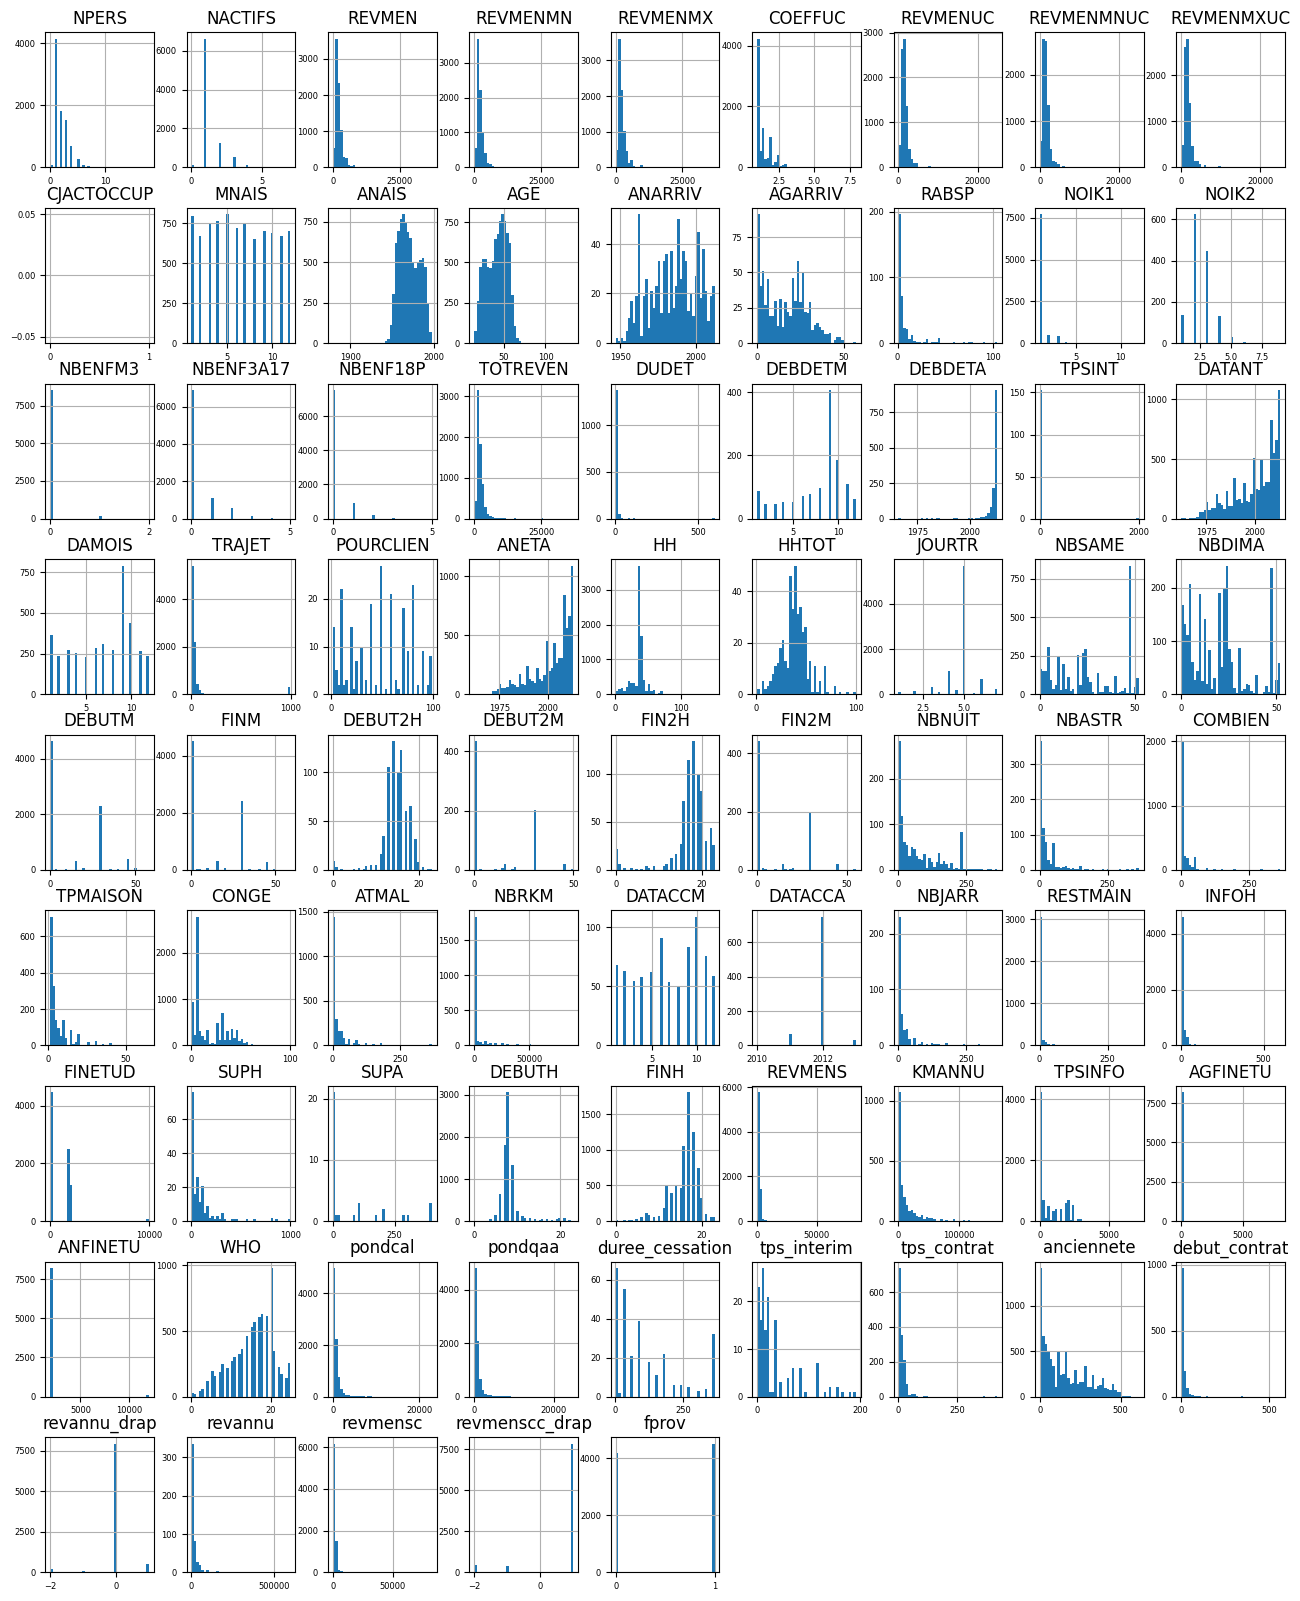

In [13]:
df_en_couple.hist(figsize=(16, 20), bins=40, xlabelsize=6, ylabelsize=6);

In [14]:
df2= df_en_couple[['SEXE', 'PRACT', 'fprov','SITUA', 'PASTRA','TRAREF', 'RABS', 'AIDFAM', 'IPRAN', 'TYPMEN5', 'TOTREVEN', 'REVMEN', 'STATUT', 'revannu', 'AGE']]
df2

,SEXE,PRACT,fprov,SITUA,PASTRA,TRAREF,RABS,AIDFAM,IPRAN,TYPMEN5,TOTREVEN,REVMEN,STATUT,revannu,AGE
0,1,1,0,1,,1,,,2,2,2200.0,2200.0,10,1500.0,44.0
1,1,2,0,1,,1,,,2,5,NaN,2250.0,10,NaN,55.0
2,1,1,0,1,,1,,,2,1,1200.0,1200.0,10,15000.0,72.0
3,1,1,0,1,,1,,,2,1,1500.0,1500.0,10,8000.0,49.0
4,2,1,1,1,,1,,,2,2,NaN,1100.0,10,NaN,60.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8672,1,1,0,1,,1,,,2,1,1850.0,1850.0,6,NaN,34.0
8673,1,1,0,1,,1,,,2,1,1300.0,1300.0,6,NaN,54.0
8674,2,1,1,6,2,2,,2,2,5,2000.0,2000.0,10,1400.0,64.0
8675,2,2,0,3,,1,,,2,2,NaN,NaN,6,NaN,16.0


The heatmap allow us to determine if there is a correlation between two variables

In [122]:
df2['SEXE'] = df2['SEXE'].astype('category').cat.codes
df2['SITUA'] = df2['SITUA'].astype('category').cat.codes
df2['STATUT'] = df2['STATUT'].astype('category').cat.codes
df2['revenu'] = pd.to_numeric(df2['revannu'], errors='coerce')
df2['AGE'] = pd.to_numeric(df2['AGE'], errors='coerce')
df2['TOTREVEN'] = pd.to_numeric(df2['TOTREVEN'], errors='coerce')


df2 = df2.apply(pd.to_numeric, errors='coerce')
df2.fillna(df2.mean(), inplace=True)


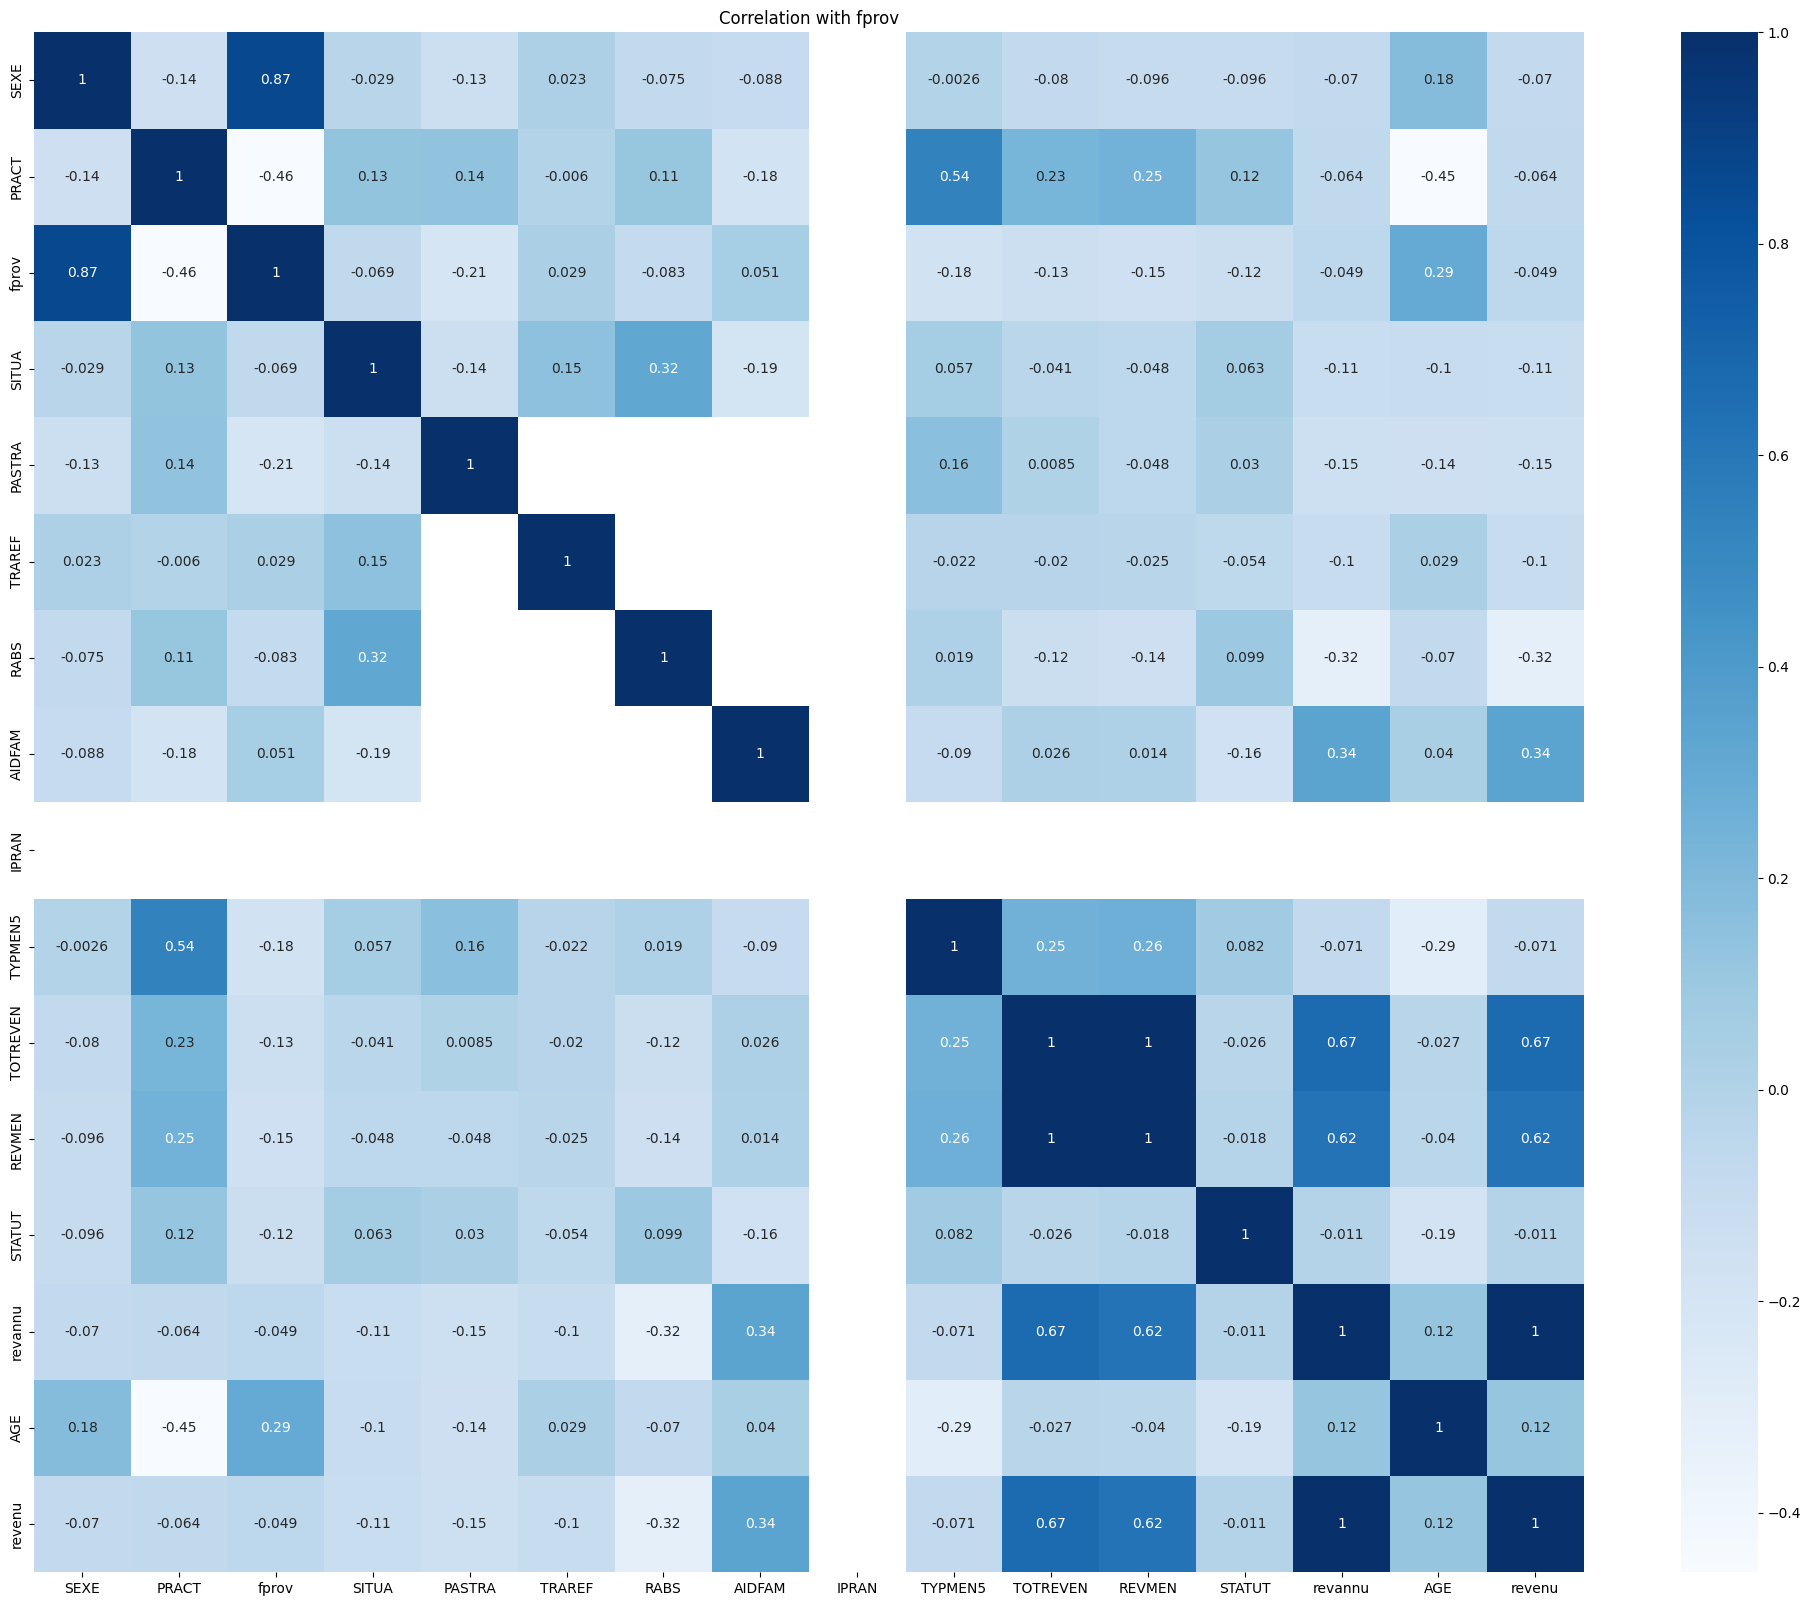

In [116]:
# Multicollinearity
corr_fprov = corr[['fprov']].drop('fprov')

fig, ax = plt.subplots(figsize=(25, 20))
sns.heatmap(corr, annot=True, ax=ax, cmap='Blues')
plt.title('Correlation with fprov')
plt.show()

Splitting data for train and test

In [123]:
X = df2.drop(columns=['fprov'])
y = df2['fprov']

X_train , X_test , y_train , y_test = train_test_split(X ,target ,test_size=0.2 , random_state=42 )
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (6941, 15)
y_train shape: (6941,)
X_test shape: (1736, 15)
y_test shape: (1736,)


In [99]:
dummy_classifier = DummyClassifier(strategy='most_frequent')
dummy_classifier.fit(X_train, y_train)
y_pred = dummy_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Baseline Model Accuracy: {accuracy:.4f}")

Baseline Model Accuracy: 0.4839


In [124]:
LR_model = make_pipeline(
    SimpleImputer(strategy='mean'),
    MinMaxScaler(),
    LogisticRegression()
)
LR_model.fit(X_train,y_train)

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('minmaxscaler', MinMaxScaler()),
                ('logisticregression', LogisticRegression())])

In [125]:
# get predictions for training and testing data
y_training_pred = LR_model.predict(X_train)
y_testing_pred = LR_model.predict(X_test)

#get accuracy for training and testing
training_acc = accuracy_score(y_train, y_training_pred)
testing_acc = accuracy_score(y_test, y_testing_pred)

print(f"Training accuracy : {training_acc: .4f}")
print(f"Testing accuracy : {testing_acc: .4f}")

Training accuracy :  1.0000
Testing accuracy :  1.0000


In [55]:
df2.dtypes

SEXE         object
PRACT        object
fprov         int64
SITUA        object
PASTRA       object
TRAREF       object
RABS         object
AIDFAM       object
IPRAN        object
TYPMEN5      object
TOTREVEN    float64
REVMEN      float64
STATUT       object
revannu     float64
AGE         float64
dtype: object

In [51]:
df['AGE'] = pd.to_numeric(df['AGE'], errors='coerce')
df['TOTREVEN'] = pd.to_numeric(df['TOTREVEN'], errors='coerce')
df['REVMEN'] = pd.to_numeric(df['REVMEN'], errors='coerce')
df['revannu'] = pd.to_numeric(df['revannu'], errors='coerce')


In [60]:
categorical_columns = ['SEXE', 'PRACT', 'fprov', 'SITUA', 'TRAREF', 'AIDFAM', 'IPRAN', 'REVMEN']
df_encoded = pd.get_dummies(df, columns=categorical_columns)

KeyError: "['fprov'] not in index"

In [23]:
categorical_columns = ['SEXE', 'TYPMEN5','PRACT', 'SITUA', 'STATUT', 'TYPMEN5', 'IPRAN', 'AIDFAM', 'RABS', 'TRAREF', 'PASTRA']
numerical_columns = ['TOTREVEN', 'REVMEN', 'AGE', 'revannu', 'fprov']

In [37]:
df2[numerical_columns] = df2[numerical_columns].apply(lambda x: x.fillna(x.mean()))


/var/folders/nd/tlvj5bgn4zv2nrczbbjppffr0000gn/T/ipykernel_871/3331096568.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[numerical_columns] = df2[numerical_columns].apply(lambda x: x.fillna(x.mean()))


In [44]:
X = df2.drop(columns=['fprov'])
y = df2['fprov']

In [39]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='mean'), numerical_columns),
        ('cat', OneHotEncoder(), categorical_columns)
    ])

In [33]:
pipeline = make_pipeline(
    preprocessor,
    MinMaxScaler(),  # Scale numerical features to [0, 1] range
    LogisticRegression()  # Logistic Regression model
)

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [57]:
pipeline.fit(X_train, y_train)


ValueError: A given column is not a column of the dataframe

In [69]:
df2.fillna(df2.mean(), inplace=True)


TypeError: Could not convert ['1111221111111122211112112111121221111212112121111111111121111111111121121111111111111211111112211111111121111121111122111112112121111111211111111211111121211111121121121121111111111111111112221111111111111111111111111111111111112111111111111111111111121111111211111111111211111111111111111111111111111121111112121112111111112211111111111111111211111111111111111111111111121111111211121121111111111211111111111111111111111121111111211111111121111111111111111111111111111111111111111111111111111111111111112112121111111111121111111111111111111111111111111111111111111112111111211111111111111111111111111111111111111111111111111121111111111111111112111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111122111111111111111111121111121111121111112112111212111112121112111112222111111211111211111222112112121111111112211111111111111111111111111111111111211211112111111111121111111111111111111111111121121111111111111111112211111212111112111112111111221111111111111111111112111111111111211111111111111111111111211111221111121111111211112121112112211121121212121211122221221111121111121112111212111112111221112121212111111121121111112121211221212212212122222121112112111112111212121112111211121111111112112112111222121111221222222222221212212222222222212111111111111111111211211212111221212211221121211111111111111111111211111111111211111111211111111111111211111111111121111111111111112111111111111111111111111121112111211121111211121111111111111111212111112111111111111111121111111211111111122112121112111111111111122211222121111211211222122112111111111211121112112211112212112112221211111112211111111121111221211111111111112111111211111211111212112212121112221111111121111111121121211111111111112111111111112112111111211111111111212111111112111211111112111121212112111111111212111121112111111221111111211111121111212111111111111111111111111111111111111211111121211112122111122111121211111111111111111122112111211111211111111121112111211111211111111122221111121211112212111121111121221121122222212122222121122222222212121212221122122112221111122111111222212122122211211111222122112211112222222222222222222222222222222222222222122222122222222222222222222222222222222222222222222222222222222222222222222122222222222222222221222222222222222122212222212222122222222222121222222212121222112212222222221122212222222222222222222222221222222222222222221222222212122222222212222222222212222221222122211222221121122222222212222222222212222122222222222222221221222121222222222222211222222122222222222222222222222222222222222222222222222222222212222122221221112211222222121122212211212221222221222221222222222222112221122221122222222122122212112221222122212221222222122222222222222221222111122222212122222112222211222222121122212122212122212222211121121212222222222222212112112212121121122222122111222212222122211221111112111211111111112121112122112111112122111112111111111111111111111212111111121121111111211111211111111111121111111211211112211211211111111212111121221111111111212211222112112111111211112111111212121122112222222222112221222122222222222222222222212212222122212212122222222222222222212222122122221222222212211122122112221222221222222222222221221221122122221222212212112222222122222221222212222222222222222112212222222222222221122122222222221122222221121222122221121222222122221212222221222221221222222222222222122212222221222122221222222222222222222121222222222112121221221222121222222122122222222222212222222222222221222222122222211222112222112222122222211222221221221222222121121222221221222111122222222111222221222212221221221222222212222112122122211222222212222221212222221122221222222121222222222222222222121112212222222222122212222222222212212222221221111212212222222221222222222122112221222222122222122222112222122112222211112112222112111122221212122212222222221221222221222221221122221212221222112111112221112221112122121221121112212121211222222122112222121212222222222222121112212112222222221212111112122211111121211121111222112111212211112221121211111121122221111211121111122111111211111111111122112211122221221222112221122222212222222222122122121212222221221222222222211212222222222121121212122221122122112121121222222222121121222122211222122212222221222212211122122222222222222122222222212222222222222212222212212222222122222222121211222122221222222122221111222212221222222221211122212112221222222222212221212112222122112122222212121122222212222221221222121222222222121222212221122212111212222222222222222212222112221222222222222222212222222121221111112222221222222222222122222212212212222221212221211112221212212122222112112111122221222221211211122222121122212222111212212111121112111211112121112212112222221211121112112212122221212212112222122112112222211211222122212221112222112211222111212112212121122212221121212212112122112122212221211112222212221112222212222111221211112112121221121111111111211122212121212212121111111111112111111111211111111111111211112112122222222212112222122121111222222211111211222221111222211112211111111121121212112211221111122112111122122221212111111121211121111121212212111212111122121212222222222222222212122221222221222222121211212122112222212221122222122222122121222112222112211212211112221122222112112112122112121122221211222221121112122122221211111222212211121111222222212122222222222212222222222122222222222222222222122222221122222222222222222222222222222222222222222222222222222222222222222222222212222222222212122222222222222222222222222212222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222122222221222222222222222222122222222222122222222222222222222221222211222222222222222222222222222222222221222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222111121211112221111211111212122121121211122111111111111111111212121122111111112222212222122222122222121122222222222222122222222122222222222221212222122222211112121222122212222221122221222222221222222122222222222121222212222121122222212212222222122222212222212212222212222221221112212222212122121122112222222222122211221222222222112121222122211222222222222212222122211222212212122221212222222221222212211221121221222221212222222221222222222121122122111111222221221222222222222221221212222222222222221122222222221222122222222222221222212222222212222212222121222212122222222122222112222222212212222212212222222222222222221122222122212122222211112221111222221222212222222221212212211222222112221222222122222222221222222222222122222221222222222121211222222222112112121221222222221121222121112122222222222222222122212222122222222222221222222222212211222221212122222222122222122212121112121121212211122122222211222221122222211211222221222212222222222122221121211212111112112121122222222211122111111111212212112112222222212111211212211222122212121222221111221222121222211112122121122122212121212221222222221222112222222222122222222222222222212222122222222222122222222222222222122122222122222222222221222122122222222221222222222222222222222222212211221222222222212222112222222212111122222222222222221221222222222212222222222222222222222112222222222221222122222222221222221222222222222122212222222222212222222222222222222122222222212222222222222222222221222212222221222122222222222221222222122222112221212122222221222211222212221222222222222222222222222222222222222222222222222222222222222222222212222222221222222222122122212222221222222122122222222221222222222222222222122221222222222222122222222212222222222222122221222222222222121222222222121222222222222222112222221222222222222222222222222222222222222222212222222222222222112122222222222222222222222222221221122122121122111222121212122222212221121111221222121112122221222211211221211121111111212122221212222211122222112222222221222222222222122222211222221222211211222212122222222112222122222222221122222122221222222222222222221222221222221211222112222212212222221222212122222211222121121221222222212221222222222212222211212222222222221222211211122212221222212222212122212222221122111221211212222222222222221222222221222222222212221222212221212121222212112222121121221212212222222212222221122221111222221212212221112111221221212112212212221112111111222212111221211121222221221221122222122221122222222122222112222122222122221211222122222221112112221112212222111212211212121212111222222212222122211212222211221121212222222221222222222222222211112122212222221212222122222221121222222221221222212221221222212211221122211122112222211211121222222112212121122222122212212222222222121222222222222211211122212212112122211112222221222122221122111222112122212111221222111221121112222212222211212212222112212122111211111121212222112211112121121211221112221112111112111221'
 '1211121211111112111121211211211111211122221111111112111211111211112112211111122221111111112121111221111111211112111111221111111112211211121121112111111121111111221111111211111111112211111121111211211121121121122122111122111112221121112121121121211111111111121212211111221112111212222121112211211111212212112111212211112111111112211211111121111121211111112111111111222111111122111112212212221111122111211211112221111111121111122112121111112222111111111111211111111211211121111121221121121111111111121121211111112221212122112112111111212112211111221111112212211122222221222122112122121121221111222122211112111121111221211122112111211211111111111111111112111111211111211121121111121111221121221112111121111111212121121121112121211111212111111111111121111211112111111211121111211121111111111111111211112111111111111111211111111111111111211111122222111122122121112211111111112112111211111221111111212121211121211111122111111111111211212121111111111122112111111112212121212111121211111111111221211112112122122221211111111221111112112112111111121111111111111111111111111112111111111111121111112121121211112121111112212221122121111112121211121221112211112111211211111112111111111111111111111111211121111121111111111111111111111211121122121111211111121111111112122111111121111111121111111111211111121111112111111111111111111111121112121211112111111112211111112211211111122111111111211111111112211111111111112121111111111111211121221111111211111222112111211211122211111111121111122111211111111111111111122111122121121111111111121111111111111221121111111111111112211111111111111111111111111112111111111111111111111111111111111112111111111111111221111112211111112211212122111111111121111112222121212122112111121112121221121112111111121111211121111112112211111112211111111112112111111112111111111111111122111111111122111111211112111111111112111121111211111211112211121211112111111111121111111111112112111112111211111112111111112121111122111211111111211112111111111212112111121112111212211111111112211211111111111121121211211111211212111112111112121211111212122111122111111121111111211112111112111111112111112111111121112111112111111112221112221111111212111111111111111111222111121111111111122112211211112111111112111111111111111111111111211211112111111111111111111112111221111111111121111111111111111211121121212121111111111212111121122221112111121111111121221211111121122111121211211111121111111111111111111111121112111112122111111111211111212111111211111111212112112211211122211111111211211111121111121111111111111222112111121111112111111111112111211211111122111112111111111111112111111121111111111111121121111111112111112111111121211111111111112111112111112121111111221111111111111111112211111111211111111111111111111111111111111121111111111111112112111111111111111111111111111111111211111111111111111111111111111111111111111112111111111111111111111111111111111111111111111111111211111111111112211212112111111111211111111222111111111111111111111111111111111111111111111121111111111111212111111111111111111111111211111111112111121111112221111111112111211211111111111112111111111111111121111222111121111112111111111111121121111121111111121111112111111111121211111211111222111112112111211111111111111111111111111111111111111111111111111111111111121111111111111111111211111211211111111111111111111111121111211111111121111111121111112111211111111111111211111111212111111111111111111111111211111111111111111111111112111111111111111111111111221111111111111112111111111112111111212111121111111111112211111111111111112111111121111122111122111111111212111111111111111111121111122111111111112111111111111111111111211111111121111111111121111111111111111111211112111111111111111111111111111121111111111111111111111111111111111111111111111111111112111111111111111111211111111111111111111111111111112111111212111111112111111111111111111111111111111111111111111111111111112211111112111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111112112121211121211112111111211112111111112121111111111111111111112211121111111112211112111111111111111112121111122212121111111211121211111121111111211211111211111111111111111111111111111111211111111211111111111211111111111111111111111111212212212121211122122111221111122212211121111111111111221121121112111121211211112112211112111211112112111111121111111112211121212111112111111111212111112121212111211111221111122221112212221111222211112112111211211111221111111211111111121121211122111211212211211222211222121221122121111211211111112111111111111122111111111121212222111112111222211111111211111111122111112111111121121111211111111111111211212111111111111111111111111121111111211121121122211112111122211111111111111211122111121111111111111112112111111121111112211211212111111111211111111211111111111111211212111111112111121111112111111112111111111111111111111111211111111111111111111121111111111111111111111111111121112122211121122211122111212211221212211222122221212211212211111111111111111211111111112111111121221121111111111112111112121212112222211211111211211111121121212211121111122111121111211121111211211211121211111111121211211111112111111112211111112111112111111212111111111212111111122111111122111211121212121221111112111111122211121111222211112121112111211112112112121211221111121111111211211111111111111212111211121111111111122211121221111122112212211121121122121221121121111112111111211111111121111111111111112111111111112112211211111111111111111111111121112112111121122112112121111111111111111111111111111112112111112111111211222111111212111111111111111111121111121111111111211111111111111111212111111111111111111111111111111111211111111111211111111111111111111111122112111111111111111121111111111111112112221111121111111111111221111211111111212112111111111211111122112111111111111111111121111111111121111111111211122121211111111111111121111211121121111121121121111211111122111211111111111121212111111111111111111111111111221111111211121111111121111111111111111211111211121211111111111211111111122111111111111111111211112211111111111221121111111211212121121121211111121111111121111122111111211111111111111111111111112111111111221111112221211122111111111111112111122222111121111111111111111121121111111211111112111111111121111111112111121112111121111111112111111112111111111111111111121111111121111112111111111122111111111111111112112111111121111111111221112111112111111111111111221111111112112111111211111111111111111111111111211211211111112121111111111112111111111111111111111111111111211211121111211111111111121111111111111111111111111111111111112211111121111111111122121111111221111111111111111121111211211111111112111211211111111111111121211111112111111111111212112211111111111111211111111111111111111111111112111111111122111111111111111211121112112211112111121211111111111111121111112111111111111211121111111121111211112111111111111111211211111111121111111111111111111111211111111111111111111111111211221111111111111111111111111111111111111111112111111111111111111211111111111121111111111111211111111111111111111111111111121111111211112121111111112111111111112111111111211211111211121111111111111111121211111111111211111112111111111111111221111111111111112111111111111121112111111111111111111111111111111111211111121111111111111111211111111121111111111111111111111111111111121112221122122222212111122121111111111111111111111111111111111111111111111111111211111111111111121112211111111111111111111111111111111111111111121111112111111111111111111112111211111111111111111111111111111111111111111111111111121111111111211111111111111111112111112111111111111111111111111111111111111111111111111111111111111111111121111111111111112111111111111111111121211111111111111111111121111111111111111112111121111121111111112111111111111111111111111111111111111111111111111111111111211121211111211111111111122111211111122111111111111111111111211111111111111111111111111112111121111122111111122111121111111111111111111111111211121111111111111211111111111111111111111121111121111111111111121111111112111112111111111111111111111111111111112212112121212112111121111112111111112112111211221111121111111222221111112221111211112111121121211111221111111211212121221221121111222211111121211221212111211111111111112112112112111111221121211121211111211111111111111121111112111111111121121112121111121111111211111111111111111112111221111111111111111111111121111111111111111111111121111111111111111111111111111111111111111111112221111111111111111111111111111111111111111211111111111111111111112112111111111111111111111112111111111121111111111111111211111111111111111111111111211111111111111111111111111111111111111112111111111111111111111111111111112212111111111111111111111112111111111212121211211211111111221112111111111111121'
 '111111431111111111111111111111111111111461111111144211111111111111111111111111121111111811211111111111111111111111111111111111116411111112111111414111111111111111711118111111414441111111411111111141181181141141116211111211111123111111111111181111111111111111111114111111111111111111211111111111111111111111211111111111211111111111111111512411114111111111111111111114211181111111111111111211111112111111121111111111111111111112141111111111111211111111111111111111111131111111112844141111111111111111111111111111111111111111111111111111111114111111181111111112142121212122114111311211111112111132111131141411114411131114111211111121111111111111111111111211111121111111111411111111111111112111111111111111111111111111111111111111111111111111111111114111144111141111111113111111111111111111111111111111111111111111111111111111111111111111111111111211114111211111111111111141211111111111111111111111111112112121111111111111111111111111111111111111111111111111111111122116111111111111411111131111111111211211121121111111111111111111111111111111111111111111111111111111111111111111111111111111111111111118111111111111111111111111111111111111111111111111111111111111111121111111111111111111111111111111111111411111111111111111111111111111111111111111111121111111111111111111111111111111145111111114141141112111111114111111111111111111111111111111111111111111111111111113111111111111111111111111111111111111211111111111151111111121111111112141111241111111121111111111111111111111111111111111111111111111111111111111121111111111111111111111111111111121111111111211111111121111111111111111111111111111111111111111111112111111111311111111111111111141111111111111131111111111111111111111111111114144114111111111411112411111111111111111111111111111141111111111111111111111111111111111111111111111111111111111111111111111111111111211111111411121111111111111111111111111111111111111111111111111111111411111111111111111111111111111111111111111111111111111111111111111111111111111111111111134131111111111311111111111111111111121111111111111111111111111111111111111111111111111112115111141111111111111111111111111111111111111111111311114111121121222111111111211111111111111111112111181111111111111111211131111111111111111111111111111111111111111111111411111111111111111311111111111111111111111111111111111141111112111111111111111111211113111111111111113111111111121111111111111111111111111111121111111111111111111214111141111111111111113111111111111111111112111111131113311111111112111111114111141111111111111211111111131122111111111111113111111111111111121111111111111111111111111111111111111111111111111111111111111111111311111111111112111111111111211111111111111112111111111112111111111131111111111111131412111111511111114111111111111115111111111111114111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111121121111111111111121111111111111111111111111111131111411111111111111111111111111111111111111111111111111111111111111111111111111111111111111321111111111311111111111111111111111111111111111111111111111111111111111111111111111111111112111111111111111211111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111114111111111111111111111111111111111111111111111111111111111111111111111111111111111111113111111111111111111111111111111111111111111111111111111131111111111112111111111111111111111111111111111111111111111111111111113111111118111121111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111211111111111111111111111111111111111111111111111111111111111112111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111112111411111111114111111111111111111111111111111111111111111111111111111111111111111111111111111155111111111133211111111111111421211111111111111111311111311112111111111111111111111111111111111111111111111111111111111111111111111111111111111111111141111113413341111121111311111111111111111311111111111111111111111111111111113111111111111114111131111111111111111114111112111111411411111111121111111111111111111111311111221111121131341111111111211111141131111111111111111111131111111111111111211111331111113118111121111111111211411111121121111111141111112111121211111111111111131411111111411415111111111112111111141111111111111111111111111111111111411111111111111111111111111211111811111111111111111351111111111111111112111111111111111111111416114111111141111114111111111111211111111111111121151111111111118111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111114211411141111113111112111111111111111112211211111212211111111111111111111111111111111111111311111111111113113111114111132112111111111111211111111121111111111111111111111111311111113111211111111121211111311111411211141113111111413131111111111113441111112314111111111111111111111111133121211111111111111111413331111111311111111118211313111111111111111111161111111411111111111111111111111111111112114111411361111111114811111121111111121111111111111111131131111121124511111111411111111114111114111114618141111111111115111111111111111111111441111111111111111111111111111141111111111411111111111111111111111111111111111111111111111111611131341131111111111411111111111111111111111111111141141111111111111111111111111111111111111311111111111111111111111111111111111111116111111181111111111111111111111111111111111111111144111111141111211111111113141111111111111411111113111117111111111111141111111131111111111111211111111211111111111111131111111111111111111141111411111111111111111111111111111311111111111114111111111111111311111111111111111113111111111111111111111111311111111111111111111411111111111111111114411111814111311111181111111111111111111111114111121111111111111111111111111111111111111111111111111111111111111111111111111111111111411111111111111111111111111111141111114111111111111111111111111111111111111111111111111111111121111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111121111111131111111111111515111111111111111411111111111111111111111111111111111111111111111111111111111111114111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111414114111371111111111111111111111111111141111411111111111111111111111111111111211111113111441431111141111111511511111111111411125111111111111111111111111114111411111111111111511111111141411111111111111111111111511141111111111111111111111111111111111111111111111111111111131111111111111111111111111111111111311111111111111111111111111111111111111114111111111111111111111111111111113111111111111111111111111111111111111111111111111111111111111111111111111111311111111111111111111111111111115111111112111111111111111111111111112111111111111111111111111111111111111111111111111111111111111111111111111151111111111111111111111111111111151111111111111111111111111111111111111111111118111111111111111111111111111111111111111111111211111111111111111111111111111111111111111111111111115111111111113111111111111111111111111111111111111111111111111111111111111113111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111311121111121211111113111111111111111111113311111111111111111111111111111111111111111111111161111111111121111181111111111111111111111111111111111111111112111111111111111111111111111111511111111111111111111111111111111111111111111111111111111111111111111111113111111111111111112111111111111111111111111111111111111111111111111111111441111111111111111111141111111111111113111111111111111111111141111111111111115511311111111111111111111131111111111111111111211111111131111111311111111111111111111111111111111111111111511311111111111111111111111111111111111111111111111151111111111131111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111115111111111111111111111111111111511111111111113111171111111111111111111111111111111111111111111111111111111111111811111111113111111111118111111111111111111113111111111111111111311111111151111511111111111111111111511441114116114111211111384111111111111111111111111631'
 '22222222222211221221222111221221122122211211111122122211112221121121112221212221222222221112222211221211221112111211221211111212222'
 '111111111111111211111111111112111111111221111111122111111111111111111111121111111111111211111111111121112111111111112111111111111111111111111111112111111111111111211112111111111111111111122111111121111121111121111211111111211111111111111111121111111111112111111222111121121122111111111111111111111111111112121111111111111111111111111121211211111121211112111111111111111111111111111111111221211111111121111211111111112111111211111111111111111111111111111111111111121121211111112222221111111111111111111111111111111111111111111112111111111111111111111111111111111111112121112111111112111211112111111121111111111221211111111111111121211111112211112211111111111111122111111211111111111111111111121111111111111111111111111111111211111111111221111121111211112111111211111111111111111111111111111111111111111121111111111111111111111111111111121111111111111111211111111111111111111211111111111111111111111211111211112111111221111111111111111111111111111111111112111111111111111112111111112121111111211112111111111111211111111112111111111111111111111111111111111111212121121111111111111111111111111111111112111211111112111211121121111111112111111111111111111111111111111111112111111111111111121111111111112121111221111112111111121111112111111111111111111111111111112111111111111121111111121121111112111121111111111212111111111111112112111111111111111112111111112111111111111121111112121111111111211111111112211111111211111111111111111111111121111111111111111111111111111111111111111211111111111111111221111111111111121111111111111111111111111121121121111111111111111112221111111111111111111111111111111111111112111111111111121111111111111111111111111111111111111111111111121211111111111111111112211111111112111112121111112112111111111111111111211111112112111112112211111111111111121121111111111111111111211111111111111211111112111111211111121112111111111211111211111112111111111111111111111111111112111111111112111112111121111121111111111111111111221111111111111111111121211111121112111112111111111111111112111111111211112111111111112111211111111111121111111111111111111111111211111111111122111111211111121112111111111111111112111111111221111111111111111111111111111111111111111111121121111111121111112211111111111211111111111111111111111111111111111121111111111111112111121112121111111111111111111111111111111111121111211111111111111111111121211122111111111111111111111111111111111111111111111111111111112111121111111111111111111211111111122111112121121111111112111111112111111111111112111121221111211111112121111111111111111111111111111111111111211111111221111111111111111111111111111111111111111111111121121111111111111111121111111111111111111111111111211111111211111111211111112111111111111111111111111211111111111111111111222111111111112112112111111111211111111111111111111111111111111112121111111111111121111111111111111111211111111112111111111111111111121111111111111111111111121111211111121211111111111111111111111111111111112111111111111111112111111111111111111111111111211111121111121111111112111111111111211111111111121111112121111111111111121111121111111111111111111121211111111111211211111211111111111111111111111112111111111121111111111111111221111111111111111111111111111111111112211111111112111111111111111111112111111112111111111111111111111111111111111111111111111111111211111111111111111111111211111111121121111111111111211111111111111112121111111111111111111111111111112111111111111111111211111111111111111111112122111111111111111121212121121111111111111111111111111111111111121211111111111111111121121111111111111111112111111112111111111111111111111211111111111121211122111111111111112111112211111111111111111111111111111111111121211122111111111111121212112112111111111112111111111111111211111111111111111211111111111111111111122111111111111111111121111221111111111111111121111111111111111111111111111111111111111111111111111111111121111112111111111111121111111122112111111111111111111111121211111112111111111111111111121111111121111111111111111111111211111211121111112111212111111111111111111211121112121111111121111111111111111211111111111111211111111111111111211112111111111111111111111111112111121111111111111121111111111111121111111211111112111111111111211111111111111121111212111111121111112121111111111111111111111111111121111111111111111111111111111111111111111111111111111121111112111111111111121121111111111112111111111111111111111111112111111111111111111111111111211111111111111111111121111111111111121122111111121111111111211111111111111211111112111111111111111111111121111111111111121111111111111111111111111111111111111111111111111111111111211211121111111111111111111111111211111111211111111111111121111221111111111211111121111111111111111121121211111221121112111111111111111111111111111121111111111111111111111111111111111111111111111211112111111111111111211111111111121111111111121111111111111111111111111111111111112111111111121111111112111211121111111111211111111111111112111121111111111121111111111111111111211111111111111111111221111111111111111111111121111111111111111111111111111111111111211111111111112111111112111111111111111111111111112111111111211111111111121111111111111111111112111212111121111111211111111111111111111212111211111111112111112111111121111111212112111111111111111111111111121111111111111211111111111111111111111121112111112111111121111111111111111112111111111211121111111111111111111111111111111111111111111111111112111111111111111111111111112111111111111111111111111111111111111111111111111111111112111211112111111211111111111111112211122112111111111111111121111111111121111111111111211111211111111121111111111122111111111211211111111111111121111121111122111111111111111111111111121111112111111121111111111111112111111111111111111111111121112111211111111111111111111111111111111111111111112112111121112121121121111121111212111121211111111111111111211111211111121211111111111121112111111111111111121111111111111212112111111111111111111111111211111111111121112111111112111121112111111111111111111111211111111111111211111111112111111111111111111111111111111112211111111221111111112212112211111111111111121111121111122221111111121111111111111111111111111111111111121111211111121111121111111211121111221111111111111112111212112111121111111111112111121112121211111111111111111121111212112112111111111121111112121111112121111111111111121112211111212111111111121111121111112211111111112111121111121111211111112112121111111111112111111111112111111111121111111111111111111212112111111111212111111111121111111212111211111121211121212112111121211121111111121111111111111111111111121111111111111112111111121111111121111111111111111221111121111121112111111121111112112111222111111111121111111212111112111121111221111111111111112121111111111211111111111211111111112121111111111111111121121111111121111111121111111121111111111111111111111121111211111112111111111121121211212111112221211111111212111112111111111111111111112211111121211111111111112111111112111111111111111121111112111111111111111212111111112111111111211121111111121111111111111111111111111111111111111111112111212111211211111111112111112111111111111111211111111112111111111111111211111111111121112111212111111221111111211111111111111111211111111112111121211121111111211111111112121121111112111111111111111111111111211111121211111111121111111111111211211111111112112111111111111111111111111111111111211121112112111111111111111111111111111111111111111111111111111111211111211111111221121111112111121111111111111211111111211111112111111111111121111111112111111121112111111111211111111111111111111111112121111111111111121111111111112111111111111111111111112111111111111211111111111212111111112111121121111211111111111111111112111121111111111111111111111111111111212111211111111211111111111111111211111111111111111111221111111111111111111111121111111111111121111111111111111111211111111111121211111211111111111111111111111111111211111121111111111112211111111111111111111112111121111111112111111211111111121111112111111111112111111111111122112112112112111111111111111111111211212111111111212111221111111111121111211111111111111111111112111111111111111111111111111121111111112111111112111111112111112121111111111111112112111111111111111212111211111111111111111111121111111211212111211212111212111111111211111111111111111211111111121111111121121111111111111212111111111121211111111111112112212211121111112112111112111111121121211122222221112112211211112221112111111211111122212221111111111111121111211221111111122121211212111211121111112111211122111112111112111111112111111111121211111221111111211112211111112111121111111111111222111111211111112121122211111111211111111221112111111111111111221112111111111112112112111111111211211121121112112111211111111111111111111111121111111211'
 '211221112217111111111111211871119221281111198111117112222261612612116122112222182122111322122121112211112218221111212111112781711121272212221222111191211212211112211221911212121211218141311221222113116222112211211142121221111111217121111111121211211111116122221221121111122111121122122122122121111211212122211111121111111121111121111211211112721122211228191222121211218727312282112122221111611216112111111611121115221211111181116112211111111111212121622122212121111119281221682112211222211111126111121112212221211111211222112121112111221221111111221111112112111612122121212122112222221222111181111118212281111281111116188162122232221321211143222222212231412222214221212221111126212122121111221211221211111161611111112121171612111161112111222111111111111111121141121111131111111111111211111121121111111221111111111211111111111111111112119111212111111112216211111'
 '11222121222122221222222222222222222222222222222221222222222221222222221122'
 '2222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222'
 '2511242221151155524542242244414222212212242152151114112524441211111155151141154444122212115142222441111121112424111211542121522224114424141511112211122241222212241124111212111115511111551242555511212141152121524215521244211115442142154141121122211511121114142412411112451224111414522512415112411515144224214111422211214111221111411411125151121152211451114251211141215212211544441114411524441211144211412411114421111111141211144154144211214442241211122511412111114412211111211241454124252111251111224451415122122541414244214114122121552424411111141112114521122145424242425144214142144141421142441244421111215151211221451154424121211212214112112121111214221211425111411151251112141111241121441151121241221121422141121111114151415152514211112141112111112511515112411511141111511141212152212111111422154112211114112212411111121111121112521212254544251154145151224411111221114114111112141452111111454141422121422121114211211142211421514125151112211244124111221115212144214511152411121151221451412114212544142442441111211441122114511114142151122511111111415141111111211111111211221111142115124142141511524141212214514452544141111224151221141441214521414211221211421124112111212511112212121111211142211141111211111112112111111411142244251211522154452111121124142212221141114111241121111221421125151121215112111112212111211111141112141511115111111114411212114411412121125154242212111111115114521151212112114241211211421211521144441112112154112112124212411411144511151211145221114212411112111121111122224111154141112111111111121121111111151411241211121115111124412111121111215111111111111114211111111221121111122111112111111114211111115124221451115224211112114421414144225251122241421414224142414244244111241144552421252254112111141121221122512414122221111115211251115144214112111114251212241111111224111111111524111121422214151212111111111251515511222224422122152552115211111441241252211241122514111115111221112214111111154151111155112512411211212224111121211121212121112122111442411124111124211211111111111241125511422121422514151112111114141244121522241522224511124142111521425224111122121211124111154211111122112112212212111112441224441211111214125122221122525222155112225112422251225222512241125151112214221111222212221212125122422411115111222221212215215214112251122111222151221112211122122112521122422142212144221224221242254222124121142421222121422521221141214212141421222112252121112221212212222222254124121152222551411421211122115212122522251211224212214511221142411112112221411122221412241441144212111455114211141121111212221111114121242121222554141252111121111111215221122452212122112121242252521111225124214222224141511211511141125151554122214222211221541512411111215152112221211112412111121111121111121211112122111551212114112221114115211251111111112111141121111111511411122221112112125211111111511125112115212111112211111111121112211211111114112112112221221111111421112112221111452215114112552121412111112444121111121112111111144111111521111111111211111251211111111142524111111112111212211112111455552112111111142111114421121111124121211421211112111155122111115111122252222155225211122552121212112521225224111222151111552225212552551121252111122121155522222214215211111121112211152112221112121142111221121112111251222241112142255222111222211212122412111412521222112111222122121121221121111121111152112215221222124122211215115221212421111121224221112211115121111112122421111211121212121121221114511511112211111211221211441121121211212154121111112125221221525112241211552122125522121122111111255221511242122144212255221211121212224252121121115211221211242112222121112122211212111121111111421221522121111511412141112112112212212221412114111221111111111112211212222122121121111111211112211212112122212212211212212211121125211215512222241112522111141211155221211211112122125215151125115222112111222121111111122121112122111111112111111121221122212411111115212112211112111111211112211112111111111114212112122111111111115111212112111211212121511125111211111511221114225524522521415114111212521115511142121252211115521212211111124211242211212521512122151211121111211124121122442414541211221112241421112142225522512212121411214121211222222122121111212221422221121522111111121424121122212111225222222115421524412242211255542121242222144424422442122211211121422142141212222122222221214214522242221412114244212411554222122222212122224221212121112224222221225145412512522221451221254242124214442141244211155112212421412111422211221421111121141241211144121111214412212245421422222441224241111212412221114112211222112141122211212251414442111122221445422121122111111211224121224212212222152515421211114151552511215111211211552111511111111441122112511141151242451124111144411111111111111522224124242221112511222115522212215241122125115455521255111111421112121412112111121122421212122112124221142221114115121122121212111112111151111111421151212212212221111251221112112221111111212122115141115142421221224221144111414255441422242451124451414411414422111121512212112422225251154121221142422151221222211214222114142212112445412424141511222511121225514411142121224212121111441241121414421522142411212111242211411222522525222552525221255211522222125424111552121214112112242524121124111241111522141522112214512211145221151122455441112112112222425515114124214215541112152521211511521112111121111422222242252221252215251511242452211225214424221142142142242441122122112125425222221122222521221115112512222252125112122212222511112221212121211225111121521225152551155214522255112522211222522215221225222521515252225552252525542142522554212122222521121222121212552252122252411111212112212212414121222511212221121221122225222122421222212212512252111212211212512221145244222111121112122252212511222221224514542215222125222255222252221222211212222212252221212421111145112221122125112212211221211122112522155121251412222141524121215212121151211521141121211121151141222212112144111412121222211222214152512221125255522222212121422552122551252121121152222522225251512212222252222522555152521515111221255222112522515212125212215522121122525152252222252412424241255252211222245225511151121225111212522121112112221525222121114211222242242112225422221225511215112111112212244522211145111222221212222242251221212411221124211212111241121122122222241115225142151111114121121212125222212112111221222221522211122114212212222224151112222221512115114242111222215112111242214212214111221215112211541211125112224211112212152222221122122112111212521211415212215122241112221214111211121222211152112111221222411521251222211211121115152112212222512211121152121112121114222212221252111111112121142221141441111152221121225121211212222251211124222222415221211222152241511212154222111222122522224452215521112111221212512122112122124221121114111122211124112111111112212511111122212412252111152211111111121112121212114111111112111222241111211251212521115221211122111115411511112211241112221111111111121111221122121511522252111111212152552222112122212512521212221112221125212122524122122225122122112421122111121241212221111212222122222212252212211221212112242122221512245151222221254125222111215122111111211411211421151221211111111111222512221111122522112215112112221221122551112111112115214211122511422242124222111122111212122121222122222212211122552111112122511212452222112244222122221112251222112212221151142122411442242554525115251211111211111111212512212121221112251125221122111221221521251222111411142224412121112222142211211112152522121212112212241412414111111111121112521225115222222211251111212221112111111111211111221111212121152212121211411112212111211211212121514212122111111112112115222122121212214121121111112121225112151222121241121122212211124112111211112225551151111112112211121121111145111211121221221125111222111241111111124211112151121121111111151121112111111122211211211112212111421224412221521242212122244212121111144122111121111112112222412111111121111112211121212114122122115114111111144111241221121211121212222121242422152112222111121421221112111112221121121241112151111111221111141211111222111214251111121112222212151125111151114252214141424555112221251224252221225215222522511211552222224445551111112451121524114211242442421221442221221411214542441441141241454411211141421422115211411121111515125114214112111111145142512142221112415121112212112255151214112121112151212121121211555112111111122251152251212112512511522222211111212212211151111211115112111111211122121122111155121121111222211121112151121221215111112111221121111251141121121112211222112521211222125541121121114114211111111111111211111525111211111152111111112121212521221221112111121511212115211212222111111211121111112121112111211225111114211521122214111145112121111515211111121112111111511114122122522212251211415411111121521114142111551211521'
 '1010101010101010676610106610761066267762661067666106110101010101071071081061010661010101010101061046101010106661010106276691101021010107106106101066106106666101066661096106666101061096101077101010101010106101071071061081010109106101099910910871071010861676676777666610661062266210610726104276721067662266662676226105677610661216276722666210691091062266106366676666261066762966610626266610102222666666662272621222691010666266666666266261061010781066106661066626662666666626766677262666262666222266666222662626666666266626622626632222666262626262266262666106664162662162666610710101061010610710610101010610266610762610666610106661061066106106666661066661066661061066666666666610266666661442222626666266666626262262666626626626666662661021010610610101010106210661061091026106210101061066101021061010266664216666696236666626666610661066610106610661066910666106610991062613101010106610610610361066610676210610666666662666666666610106622101018610106666166662666666666161616661162106102621666106622210622102666666106666101066666661066666666666666666666666661666666666666666666666666666666666666666666666666666666666666666666666666616619669106666666666626666666666666766664666666666666666666666666666666666666666666666666666666666666666666666610961016666666666666662166666666616264666666664666622666666666666666666666662666666626666666666106666665626566666666616266616664666661666666666611066626666616666266666662666666646616166666666666661666666666666666666666666666666666666666666666776666261010106106910101010610610661066666610966666661010106106666610666226106661066662666662616666166106266666266216626266221656621102266266663682262225661622262651010101066966610106101061066621066666666664610610666666166666696666666166266663161666666666666663666266661266666626666666666666666666266666666666111123666666666666224361666666666666666666666666666666666666616666666666666666610666666661666666666666666666466666666666661466636666666626666666666666666666666666616666666666666666666666616666666666662666666666666666666666666666666666666616666666664616166666666266666663616666666676761010666106710610210106101066146666666666666610623366666666695666662266106666666566666666666666566666610666613667666666666666666666666366262636666106666661066666636666667216666610636666166662616166666166646266666666666666166666666661666666161066666666666664636621666661666666666666469106101010110166666610336666666636631031066610661010766466666666666666676666647666646666666666664466664664666664664664666666666646666646666766466666666646664666666666666666664444666666666666661046646666666667666666666666666666666676676666666666664666666666666666666666646666666666666666666666666664106666666666666666676666666666666666446666666662666664566666666666666666666666667666666666746447666661666666466666666467666466666666666664666666446666466666666666666666666666666666666666666666664466666666661616636666662666666666664666666666666666666666666666666666666666466664666666666666661666666666666661666666666666666666666646662661061066666666109611046666666661066666666106610666666666664666666666666666666666666666666666666646666666616666666664666666666410610666666610666666109910610666610101061099106910691066666666666166666667666666666666666666666166610666666666166666666666666666666666666666666666664666666666666666666666910101010611061110111011666461091066310111111111026611011011111616666616611261661161613212122216222222222211223121123111162232222111112221511321223122111121122112132212122222121221221222161112221222212212151312211111131213112112212121222611113325121312311621112311211112222651221321211221211623112231222162122111111122332113211111131122212162612211132213111122522251231212113112116223211221616263122512121112212123231131122312122121222122363162112621333321111231211123222122213121122221521123211232233111111222121112221212222222222621121522221111121312112122112112231221262212321112111211311521121111113211211132111112122113111322122112111121221121112321211113621221211122121132111131311121212211211322211313121311121311321122112122121211212212111123123121161253121121211212621312221112212121221122122123112122111211151121111111111111111112623121121122223151121121111111222221112111111213221111121211132211212112212112213112113212211111222322231212214211131311210161010101101110919101010111111112121111111111211211111121111121111111126111122112211111111111122211111211111211222111111121222111666666666666666666666666666666666666661666666416261666666666166661666666666666666666666664661066666666666666666666466666666466666666666666666666666666466666666666666666666666666666666666666666666666666666666666666666666666666666666666610666666766666667666666616666666666666666666666666466666666666667666766666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666626666666666666666666666666666666666166666666666666666666610666610610616666666666101062666610106666106666610666610106666661106666461066666666666666666666666666106666661066666661066666666666666666101010101010101096101010101010101010101010910101010109610666610966691066610666106106106910106666666106106666106106610106661010610101061061066610101061010961010101010101010666666566667696666666666676666669106666666666666666666666666666666610661066101066108610106666666667699666666666666666661066666666669610106666666626466566266261066646222666666222626266656616621666666666663666262631666616663126616336616666666366246646266666666226622261666666662661276666666466666466666666666676666106666666666767766666667666666666666666666666766666166666666666666666610666610666676666666276667766666666766366666566661010106101010610101010101081026466610210101010106101066610610610109109696997101010101066101010106101061010101071061010106106101010101067610106106661010661096101066661066101061010637777771077777777777777777777777777777777777777777777677766777777677777777777777777777677766227776677676777676777777107676727776276776777727627677577726262677277767726277627767767766676671646665527665777666651066677723567477726276667677107766666766266626522667776767522672777577621762766266676277627772227767777666646277666676275627766767522236107677677710107107277271076772722277777777767777127776777677272777777777727777777767777722272777666666666666622262661632666662661666666666266361666664662664616146766666666676221266221226121262226266263610422221061264510216264162222263613662612662661424266532626255661226226262622222662226222210112226610613666101011032251612212222221021022263262262222626621662222222662211226322141222222211432422211212132326221641262623622261126121623311123666622231212252242332236626266621116110223222224422262166412144552352343222662661611263263463225323622122231233223222326651111342232233222312622626666612622261442541423463661325526222222254224324432632623622322462322225123262116221212626226625666254222422216626636366133233322132132234221212323632333223621221231221022422226141224616525223224222366224411036266210236525313133322255454221326226122224223342462621626233622622622263366616611623424623162241216423422242423331102266665222212243434323243121131242222262102226226226232262621010101010108710108109610109101096610101066101061010101010101010106666661066667661066666656663266626666662666626666106106106716610106266210662210666666101010666610666666102101011072661066666161022661026610610106622101661610610106710106261266666106610101012610106106662666626106101010610102111061063414162331316656336241152636234334414333443431332165463611543341243316363443154133333333313343455333333323333333333356233366351434323554655331413323333362143544433143336432333433444334353543366634333632264334444443534633363444433126364433451344334363346633533334444433332361544333541534553422341443312466546636433324633511434443133442443465341341334244341344434665321433141101031103441010104610310343351333333333361033331316466333443344344331434444311331134632333664344343433346336433333333344343434311333333333334163344331334133333343336633344334334331333333414334533443334364363533313331034334333344434434333310333434333333344333103114101444333334333103464333331064101044344342364223333444434443346441644443434443342310410631043431433434131435463434334333333333443441434331010101031063361043153341331061010103103106661033114331093341313333433334102331033461033336310369103333633433333333321013134333339133410105103310364110310341061106636661010544533341010106110436103610396643331036334333102310104349664443443132106103333433664210361033361046610106366101061064661310153442334331010210252661665626666122223122561531264663223316122166512661625636114415666343176261662264654442614466666636621222642564562221010661661211622121126222662166216626122116222266666522261221661221226612213116222611021122116111222122242116126102626262112162126662261661111222122661666221016612210212761051211626616221211126161212222412161210626111111111111111011111111211111116111111111101211111115111111111211111111911121111111111111111211111411211111961111111111111111111111161111111611111111111111111611611111116116111111111111111110111111111111111111111116111111111111111161111111111111116111111111111111171111111116111111111111111211611111111111111111111111161111111111111611111211011111111111111111111111111111711111111116216666261761016666666110662161061666610610611166661766106886811867966666676666166108666166666138811661066'] to numeric

In [68]:
# Encode categorical variables using One-Hot Encoding
categorical_columns = ['SEXE', 'PRACT', 'fprov', 'SITUA', 'TRAREF', 'AIDFAM', 'IPRAN', 'REVMEN']
df_encoded = pd.get_dummies(df2, columns=categorical_columns)

df_encoded = df_encoded.apply(pd.to_numeric, errors='coerce')


# Define features and target
X = df_encoded.drop(columns='revannu')
y = df_encoded['revannu']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values